### Core Data K Means Clustering

### 1. Python Imports
### 2. Read input data to pandas dataframe
### 3. Create Facies and Zone dictionaries
### 4. Create new column to identify Facies and Zone by name - use dictionaries to identify integers
### 5. Filter dataframe to required and numerical columns only
### 6. Remove rows without core readings
### 7. Feature scaling
### 8. Run Kmeans clustering algorithm
### 9. Plot results

### 1. Python Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### 2. Read input data to pandas dataframe

In [2]:
core_df = pd.read_csv('Core Data.csv')

#replace =999.2500 with np.NaN
core_df = core_df.replace(-999.2500, np.NaN)

#print(core_df.head)


### 3. Create Facies and Zone dictionaries

In [3]:
def text_dict_define():
    ''' 
    Create a dictionary for the purposes of updating numerical categories in original csv file output
    Key = numerical value
    () -> (dictionary)(dictionary)
    PRECONDITION: Numbers and associated text are correct: USER RESPONSIBLE!
    '''    
    #update facies column to a name
    facies_dict = {
                 0.0: 'Marine mudstone' ,
                 1.0: 'Channel sandstone' ,
                 2.0: 'Limestone' ,
                 3.0: 'Coal' ,
                 4.0: 'Pro-delta/distal mouthbar' , 
                 5.0: 'Inter dist mud' ,
                 6.0: 'Palaeosol' ,
                 7.0: 'mouth bar/crevasse delta' ,
                 8.0: 'Trough crossbedded' ,
                 9.0: 'Floodplain' ,
                 10.0: 'Abandonment' ,
                }

    #update zone column to a name
    zone_dict = {        
                0: 'Above Quad Peaks Lst' ,
                 1: 'Quad Peaks Lst' ,
                 2: 'Above Zone 1B sheet' ,
                 3: '1B sheet' ,
                 4: 'Above1B channel' ,
                 5: '1b channel' ,
                 6: 'SE channel' ,
                 7: 'Below SE Channel' ,
                 8: 'A8 channel' ,
                 9: 'Zone 3' ,
                 10: '1B Limestone' ,
                 11: 'Zone 6' ,
                 12: 'A3 channel' ,
                 13: 'Above EelwellLst' ,
                 14: 'Eelwell Lst' ,
                 15: 'Above 1A Upper channel' ,
                 16: '1A Upper channel' ,
                 17: 'Above 1A Sheet' ,
                 18: '1A Sheet' ,
                 19: 'Above Oxford Lst' ,
                 20: 'Oxford Limestone' ,
                 21: 'Above Twin Peaks Lst' ,
                 22: 'Twin Peaks Limestone' ,
                 23: 'Zone 1' ,
                }        
 
    return facies_dict, zone_dict

facies_dict, zone_dict = text_dict_define()


### 4. Create new column to identify Facies and Zone by name - use dictionaries to identify integers

In [4]:
def text_col_id(df,input_dict, col_in_string, col_out_string):
    ''' 
    (pandas dataframe)(dict)(string)(string) -> (pandas dataframe)
    Creates a new column assigning string text from float values
    col_out_string created by matching input_dict keys to col_in_string
    PRECONDITION: Column id is correct for input - valid format for output name
    June 2020
    K JAGGS
    '''

    df[col_out_string] = df[col_in_string].replace(input_dict)

    #can check for missing assignments by uncommenting this
    #print(df.groupby([col_out_string]).size())

    return df 
          
df_core = text_col_id(core_df,facies_dict, 'Facies', 'Facies ID')
df_core = text_col_id(core_df,zone_dict, 'Zone', 'Zone ID')

### 5. Filter dataframe to required and numerical columns only

In [5]:
#filter daraframe to required columns and remove rows containing any NaN value
core_col_list = ['DEPTH','DT','DEN', 'NEU','PHIE','GR','Facies', 'Core_Perm','Core_POR','Zone']
core_col_list = ['DEPTH','DT','DEN', 'NEU','Facies','GR', 'Core_Perm','Core_POR']
core_df = core_df[core_col_list]    

### 6. Remove rows without core readings

In [6]:
core_df = core_df.dropna(subset=core_col_list)
#print(core_df.head)

### 7. Feature scaling

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(core_df.drop(['Facies'], 1))

### 8. Run Kmeans clustering algorithm

In [8]:
kmeans = KMeans(n_clusters=10)
#kmeans.fit(core_df.drop(['Facies'], 1))
kmeans.fit(X_scaled)

predict=kmeans.predict(X_scaled)

core_df['kmeans'] = pd.Series(predict)

### 9. Plot results

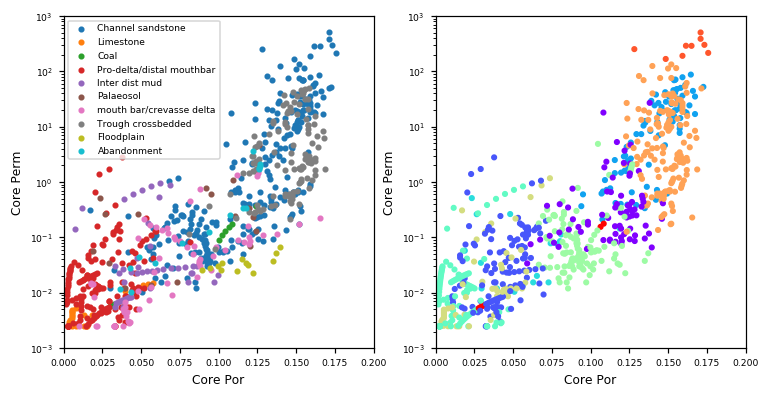

In [9]:
#print(core_df.head)

fig_core = plt.figure(num=None, figsize=(8, 4), dpi=110, facecolor='w', edgecolor='b')
fig_core.canvas.set_window_title('Breagh data kmeans clustering demo')

ax10 = fig_core.add_subplot(1,2,1)

ax20 = fig_core.add_subplot(1,2,2)

#ax30 = fig_core.add_subplot(1,3,3)

for key, grp in core_df.groupby(['Facies']):
   ax10.scatter(grp['Core_POR'], grp['Core_Perm'], marker = '.',  label=facies_dict[key]) 

ax10.set_xlabel('Core Por', fontsize=8)
ax10.set_ylabel('Core Perm', fontsize=8)
ax10.tick_params(axis='both', which='major', labelsize=6)
ax10.legend(loc='upper left', fontsize=6)
ax10.set_yscale('log')
ax10.set_xlim([0,0.2])
ax10.set_ylim([0.001,1000])


#X_scaled
ax20.scatter(core_df['Core_POR'], core_df['Core_Perm'], marker = '.',c=kmeans.labels_, cmap='rainbow')
#ax20.scatter(grp['Core_POR'], grp['Core_Perm'], marker = '.',  c=kmeans.labels_) 
ax20.set_xlabel('Core Por', fontsize=8)
ax20.set_ylabel('Core Perm', fontsize=8)
#ax20.legend(loc='upper left', fontsize=6)
ax20.tick_params(axis='both', which='major', labelsize=6)
ax20.set_yscale('log')
ax20.set_xlim([0,0.2])
ax20.set_ylim([0.001,1000])

#ax20.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

fig_core.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)


In [10]:
#core_df['kmeans'] = pd.Series(predict)